# Testing Phase

In [37]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('amazon_data.csv')

In [39]:
df.dtypes

Ranking           int64
Title            object
Rating          float64
ReviewCount     float64
Price           float64
offer           float64
sponsored          bool
DeliveryDays    float64
Sales           float64
dtype: object

In [40]:
rating_counts = df.groupby(['Sales', 'sponsored']).size().reset_index(name='counts')

# Create the Altair stacked bar chart
chart = alt.Chart(rating_counts).mark_bar().encode(
    x=alt.X('Sales:O', title='Rating'),
    y=alt.Y('sum(counts):Q', title='Counts'),
    color='sponsored:N'
).properties(
    title='Value Counts of Ratings with Stacked Color Based on Sponsored'
)

chart

alt.Chart(...)

In [41]:
grouped_df = df.groupby(['Rating', 'sponsored']).agg({'Sales': 'mean'}).reset_index()

# Create the bar chart with Altair
chart = alt.Chart(grouped_df).mark_bar().encode(
    x='Rating:sponsored_true = grouped_df[grouped_df['sponsored'] == True]
sponsored_false = grouped_df[grouped_df['sponsored'] == False]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sponsored true line
ax.plot(sponsored_true['Rating'], sponsored_true['Sales'], label='Sponsored', marker='o')

# Plot sponsored false line
ax.plot(sponsored_false['Rating'], sponsored_false['Sales'], label='Not Sponsored', marker='o')

# Add labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales vs Rating')
ax.legend()

plt.show()O',
    y='Sales:Q',
    color='sponsored:N',
    tooltip=['Rating', 'sponsored', 'Sales']
).properties(
    title='Average Sales against Rating'
).interactive()

# Show the chart
chart.show()

alt.Chart(...)

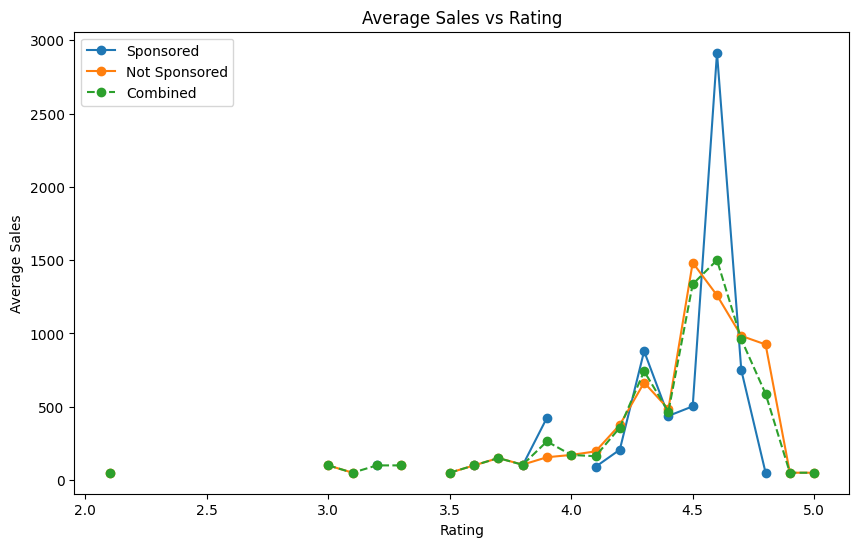

In [48]:
sponsored_true = grouped_df[grouped_df['sponsored'] == True]
sponsored_false = grouped_df[grouped_df['sponsored'] == False]

combined_df = df.groupby('Rating').agg({'Sales': 'mean'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sponsored true line
ax.plot(sponsored_true['Rating'], sponsorekkd_true['Sales'], label='Sponsored', marker='o')

# Plot sponsored false line
ax.plot(sponsored_false['Rating'], sponsored_false['Sales'], label='Not Sponsored', marker='o')

# Plot combined line
ax.plot(combined_df['Rating'], combined_df['Sales'], label='Combined', marker='o', linestyle='--')

# Add labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales vs Rating')
ax.legend()

plt.show()

In [34]:
df.dtypes

Release Date    datetime64[ns]
Time                    object
Actual                 float64
Previous               float64
dtype: object

In [35]:
df.to_csv('mortgage.csv',index=False)

In [6]:
from datetime import datetime, timedelta

# Reference date
reference_date = datetime.strptime('Jun 6', '%b %d')

# Function to calculate days from reference date
def calculate_days_from_reference(delivery_time):
    if pd.isna(delivery_time):
        return None
    elif 'Today' in delivery_time:
        return 0
    elif 'Tomorrow' in delivery_time:
        return 1
    else:
        date_str = delivery_time.split(',')[-1].strip()
        try:
            delivery_date = datetime.strptime(date_str, '%b %d')
            return (delivery_date - reference_date).days
        except ValueError:
            # Handle cases like 'Jun 7 - 11'
            try:
                date_str = delivery_time.split('-')[0].strip()
                delivery_date = datetime.strptime(date_str, '%b %d')
                return (delivery_date - reference_date).days
            except ValueError:
                return None

# Apply the function to the DeliveryTime column
data['DeliveryDays'] = data['DeliveryDays'].apply(calculate_days_from_reference)



In [8]:
data['DeliveryDays'].value_counts()

DeliveryDays
5.0     1820
6.0      236
7.0      148
21.0     101
11.0     100
18.0      43
4.0       39
12.0      32
1.0       20
15.0      19
8.0       11
14.0       8
20.0       4
22.0       4
19.0       3
2.0        1
Name: count, dtype: int64

In [ ]:
data['Sales'] = data['sales'].str.extract(r'(\d+[Kk]?)\+? bought')[0]
data['Sales'] = data['Sales'].replace({'K': '000', 'k': '000'}, regex=True).astype(float)

In [16]:
data['Price'] = data['Price'].replace('$', '').astype(float).fillna(0).astype(float)

In [25]:
data['ReviewCount'] = pd.to_numeric(data['ReviewCount'], errors='coerce')

In [34]:
data['offer'] = data['offer'].str.extract(r'(\d+)%', expand=False)

In [42]:
data['offer'] = data['offer'].astype(float)

In [46]:
data['sponsored'] = data['sponsored'].astype(bool)

In [53]:
data['sponsored'].value_counts()

sponsored
True    2960
Name: count, dtype: int64

In [48]:
data['Ranking'] = data['Ranking'].astype(float)

In [50]:
data.to_csv('amazon_data.csv')

In [51]:
data.dtypes

Ranking         float64
Title            object
a-icon-alt      float64
ReviewCount     float64
Price           float64
sales            object
offer           float64
sponsored          bool
DeliveryDays    float64
Sales           float64
dtype: object